### RLlib with Atari Learning Environment
#### Dimitrios Megkos - dimitrios.megkos@city.ac.uk
#### Environment: Atari Freeway (Ram Version) https://gym.openai.com/envs/Freeway-ram-v0/
*"Why did the chicken cross the road?"*

A classic atari game where one player (the agent) controls a chicken who can be made to run across a ten lane highway filled with traffic in order to get to the other side. Every time the chicken successufly crosses the road, a point (1) is awarded to the agent. If the chicken is hit by a car it is pushed back to the bottom of the screen. The point of the game is to collect as many points as possible.

### Import the libraries

In [1]:
# Visualization imports
import matplotlib.pyplot as plt
# Ray and RLlib import
import ray
# import tune for hyper parameter experimentation
from ray import tune
from ray.tune import grid_search
# Import a Trainable (one of RLlib's built-in algorithms):
import ray.rllib.agents.dqn as dqn # Deep Q-Network

### Setting up and trying multiple configurations
There are two ways to experiment with different hyperparameres. 
The first way is to create different configurations and pass to the trainer inside a for loop that handles the training and stores the rewards which can then be plotted for comparisons.
The second and more efficient way is to use Ray's Tune library for experiment execution and hyperparameter tuning. With this method, a grid search can be used to try different hyperparameter combinations, implementing a stoping criteria to control the training.

### Method 1: Passing different configurations to the Trainer

#### Define configurations
Two different configurations are defined below, each with different hyperparameters. The first one is a Vanilla DQN, the second is a Double DQN. Epsilon greedy is used to handle the agent's exploration-exploitation rate.

In [2]:
# based on lab 07 material
# === FIRST CONFIGURATION ===
config_1 = dqn.DEFAULT_CONFIG.copy() # copy the default configuration
# === Deep Learning Framework Settings ===
config_1["framework"] = "torch" # set pytorch for the framework
# === Environment Settings ===
config_1["env"] = "Freeway-ramDeterministic-v4" # load Atari Freeway from OpenAI Gym
# === Settings for the Trainer process ===
config_1["gamma"] = 0.99 # MDP discount factor
config_1["lr"] = 0.0001 # the learning rate
config_1["double_q"] = False # whether to use double dqn
# neural network architecture
config_1["model"] = {
    "fcnet_hiddens": [256,256], # hidden layers and neurons
    "fcnet_activation": "relu" # activation function
}
# === Exploration Settings ===
config_1["explore"] = True
config_1["exploration_config"] = {
    "type": "EpsilonGreedy",
    # Parameters for the Exploration class' constructor:
    "initial_epsilon": 1.0,
    "final_epsilon": 0.01,
    "epsilon_timesteps": 20000
}
# === Evaluation Settings ===
config_1["evaluation_duration"] = 5
config_1["evaluation_duration_unit"] = "episodes"
config_1["evaluation_num_workers"] = 1
config_1["evaluation_config"] = {
    "render_env": True,
    "explore": False,
}
# === Resource Settings ===
config_1["num_gpus"] = 0
config_1["num_cpus_per_worker"] = 1



# === SECOND CONFIGURATION ===
config_2 = dqn.DEFAULT_CONFIG.copy() # copy the default configuration
# === Deep Learning Framework Settings ===
config_2["framework"] = "torch" # set pytorch for the framework
# === Environment Settings ===
config_2["env"] = "Freeway-ramDeterministic-v4" # load Atari Freeway from OpenAI Gym
# === Settings for the Trainer process ===
config_2["gamma"] = 0.99 # MDP discount factor
config_2["lr"] = 0.0001 # the learning rate
config_2["double_q"] = True # whether to use double dqn
# neural network architecture
config_2["model"] = {
    "fcnet_hiddens": [256,256], # hidden layers and neurons
    "fcnet_activation": "relu" # activation function
}
# === Exploration Settings ===
config_2["explore"] = True
config_2["exploration_config"] = {
    "type": "EpsilonGreedy",
    # Parameters for the Exploration class' constructor:
    "initial_epsilon": 1.0,
    "final_epsilon": 0.01,
    "epsilon_timesteps": 20000
}
# === Evaluation Settings ===
config_2["evaluation_duration"] = 5
config_2["evaluation_duration_unit"] = "episodes"
config_2["evaluation_num_workers"] = 1
config_2["evaluation_config"] = {
    "render_env": True,
    "explore": False,
}
# === Resource Settings ===
config_2["num_gpus"] = 0
config_2["num_cpus_per_worker"] = 1

### Train with each configuration

#### Configuration 1 - Train Agent 1

In [3]:
# based on lab 07 material
# initialise ray
ray.init()

# create our RLlib Trainer.
agent_1 = dqn.DQNTrainer(config=config_1)

# create list to store rewards
avg_rewards_1 = []

# begin training
for i in range(50):
    # Perform one iteration of training the policy with DQN
    result = agent_1.train()
    #print(pretty_print(result))
    print(result['episode_reward_mean'])
    avg_rewards_1.append(result['episode_reward_mean'])

# shutdown ray
#ray.shutdown()

2022-04-13 17:57:23,529	INFO services.py:1412 -- View the Ray dashboard at http://127.0.0.1:8265
2022-04-13 17:57:26,024	WARNING trainer.py:2347 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
2022-04-13 17:57:26,026	INFO simple_q.py:154 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting `simple_optimizer=True` if this doesn't work for you.
2022-04-13 17:57:26,026	INFO trainer.py:779 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2022-04-13 17:57:26,194	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-04-13 17:57:26,195	WARNING trainer.py:2347 -- You have spe

nan
nan
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1
0.1
0.8181818181818182
0.8181818181818182
1.5
1.5
2.1538461538461537
2.1538461538461537
2.5
2.5
3.0
3.0
3.625
3.625
4.117647058823529
4.117647058823529
4.666666666666667
4.666666666666667
5.052631578947368
5.052631578947368
5.5
5.5
5.5
5.904761904761905
5.904761904761905
6.2727272727272725
6.2727272727272725
6.695652173913044
6.695652173913044
7.0


#### Plot Agent 1 Rewards

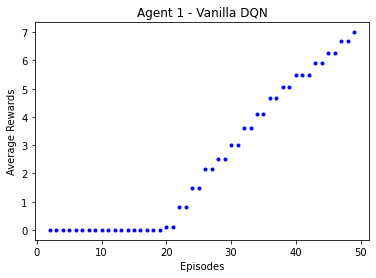

In [4]:
# plot the rewards of agent 1
plt.title("Agent 1 - Vanilla DQN")
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
a1=plt.plot(avg_rewards_1, 'b.')

#### Evaluate Agent 1

In [8]:
# evaluate agent for 5 episodes
agent_1.evaluate()
# shutdown ray
ray.shutdown()
#show agent_1 evaluation metrics
agent_1.evaluation_metrics

{'evaluation': {'episode_reward_max': 21.0,
  'episode_reward_min': 21.0,
  'episode_reward_mean': 21.0,
  'episode_len_mean': 2048.0,
  'episode_media': {},
  'episodes_this_iter': 5,
  'policy_reward_min': {},
  'policy_reward_max': {},
  'policy_reward_mean': {},
  'custom_metrics': {},
  'hist_stats': {'episode_reward': [21.0, 21.0, 21.0, 21.0, 21.0],
   'episode_lengths': [2048, 2048, 2048, 2048, 2048]},
  'sampler_perf': {'mean_raw_obs_processing_ms': 0.08932406426686676,
   'mean_inference_ms': 0.5525182832580632,
   'mean_action_processing_ms': 0.02557385562628161,
   'mean_env_wait_ms': 0.6681889158803357,
   'mean_env_render_ms': 1.1005202560566352},
  'off_policy_estimator': {},
  'timesteps_this_iter': 0}}

#### Configuration 2 - Train Agent 2

In [5]:
# based on lab 07 material
# initialise ray
ray.init()

# create our RLlib Trainer.
agent_2 = dqn.DQNTrainer(config=config_2)

# create list to store rewards
avg_rewards_2 = []

# begin training
for i in range(50):
    # Perform one iteration of training the policy with DQN
    result = agent_2.train()
    #print(pretty_print(result))
    print(result['episode_reward_mean'])
    avg_rewards_2.append(result['episode_reward_mean'])

# shutdown ray
#ray.shutdown()

2022-04-13 18:01:28,354	WARNING trainer.py:2347 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
2022-04-13 18:01:28,502	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-04-13 18:01:28,502	WARNING trainer.py:2347 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
2022-04-13 18:01:28,543	WARNING util.py:55 -- Install gputil for GPU system monitoring.


nan
nan
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.25
0.25
0.8888888888888888
0.8888888888888888
1.8
1.8
2.5454545454545454
2.5454545454545454
3.1666666666666665
3.1666666666666665
4.153846153846154
4.153846153846154
4.785714285714286
4.785714285714286
5.533333333333333
5.533333333333333
6.25
6.25
6.9411764705882355
6.9411764705882355
7.555555555555555
7.555555555555555
8.105263157894736
8.105263157894736
8.7
8.7
8.7
9.047619047619047
9.047619047619047
9.545454545454545
9.545454545454545
10.0
10.0
10.416666666666666


#### Plot Agent 2 Rewards

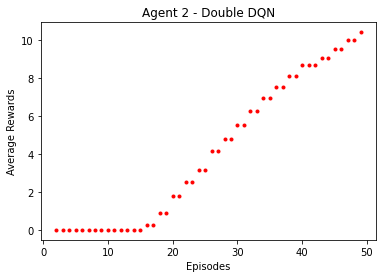

In [6]:
# plot the rewards of agent 2
plt.title("Agent 2 - Double DQN")
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
a2 = plt.plot(avg_rewards_2, 'r.')

#### Evaluate Agent 2

In [7]:
# evaluate agent for 5 episodes
agent_2.evaluate()
# shutdown ray
ray.shutdown()
#show agent_2 evaluation metrics
agent_2.evaluation_metrics

{'evaluation': {'episode_reward_max': 22.0,
  'episode_reward_min': 22.0,
  'episode_reward_mean': 22.0,
  'episode_len_mean': 2048.0,
  'episode_media': {},
  'episodes_this_iter': 5,
  'policy_reward_min': {},
  'policy_reward_max': {},
  'policy_reward_mean': {},
  'custom_metrics': {},
  'hist_stats': {'episode_reward': [22.0, 22.0, 22.0, 22.0, 22.0],
   'episode_lengths': [2048, 2048, 2048, 2048, 2048]},
  'sampler_perf': {'mean_raw_obs_processing_ms': 0.0861592968394195,
   'mean_inference_ms': 0.54730375860017,
   'mean_action_processing_ms': 0.025069873065946623,
   'mean_env_wait_ms': 0.6753676874238804,
   'mean_env_render_ms': 1.1064958297674363},
  'off_policy_estimator': {},
  'timesteps_this_iter': 0}}

#### Analysis of results
- During the first trials, a network architecture of one hidden layer with 512 hidden neurons was used for both Vanilla DQN and Double DQN. Vanilla DQN did not manage to receive any rewards after 50 iterations, achieving a mean reward of zero during evaluation. Double DQN managed to receive 1.20 average rewards after 50 iterations, achieving a mean reward of 11 during evaluation
- Changing the architecture of the networks to two hidden layers with 256 hidden neurons each greatly improved the performance of both Vanilla DQN and Double DQN. Having two hidden layers, the agents were able to perform more complex calculations enabling them to learn faster and better. Vanilla DQN started earning rewards after 19 iterations, reaching an average of 7 rewards after 50 iterations and achieving a mean reward of 21 during evaluation. Double DQN started earning rewards after 15 iterations, reaching an average of 10.40 rewards after 50 iterations and achieving a mean reward of 22 during evaluation.
- Although both agents achieved similar evaluation scores, Double DQN is the winner here because it not only because it started learning faster, but also because it managed to achieve higher score after 50 training iterations. This makes sense considering a Double DQN is using a second network to calculate the target values.  

### Method 2: Using the Tune Library
Using Agent 2 configuration (Double DQN), a grid search is going to be performed in order to experiment more and fine tune the hyperparameters. The parameters that seem to affect learning the most are the *learning rate*, the *number of hidden layers*, the *number of hidden neurons* and the *type of activation function*, therefore the grid search will focus on those parameters.

#### Define the grid search configuration

In [16]:
# === GRID SEARCH CONFIGURATION ===
gs_config = dqn.DEFAULT_CONFIG.copy() # copy the default configuration
# === Deep Learning Framework Settings ===
gs_config["framework"] = "torch" # set pytorch for the framework
# === Environment Settings ===
gs_config["env"] = "Freeway-ramDeterministic-v4" # load Atari Freeway from OpenAI Gym
# === Settings for the Trainer process ===
gs_config["gamma"] = 0.99 # MDP discount factor
gs_config["lr"] = grid_search([0.001,0.0001]) # the learning rate
gs_config["double_q"] = True # whether to use double dqn
# neural network architecture
gs_config["model"] = {
    "fcnet_hiddens": grid_search([[256,256], [256,256,256]]), # hidden layers and neurons
    "fcnet_activation": grid_search(["relu","linear"]) # activation function
}
# === Exploration Settings ===
gs_config["explore"] = True
gs_config["exploration_config"] = {
    "type": "EpsilonGreedy",
    # Parameters for the Exploration class' constructor:
    "initial_epsilon": 1.0,
    "final_epsilon": 0.01,
    "epsilon_timesteps": 10000
}

#### Run the Tuning
The tuning will run until the agents reach a mean episode reward of 12 and Tune will return the best hyperparameter combination that required the least total timesteps to reach the goal.

In [ ]:
# inspired by https://www.anyscale.com/blog/an-introduction-to-reinforcement-learning-with-openai-gym-rllib-and-google
# initialize ray
ray.init()

# begin tune analysis
gs_analysis = tune.run(
    dqn.DQNTrainer, # the trainer
    config=gs_config, # use the grid search configuration
    stop={"episode_reward_mean": 12}, # stop criteria
    metric="timesteps_total", # comparisons based on total timesteps
    mode="min" # choose based on the least total timesteps
)

# shutdown ray
ray.shutdown()

#### Printing the best configuration

In [18]:
# print out best hyperparameters
print(
  "Best hyperparameters found:",
  gs_analysis.best_config,
)

Best hyperparameters found: {'num_workers': 0, 'num_envs_per_worker': 1, 'create_env_on_driver': False, 'rollout_fragment_length': 4, 'batch_mode': 'truncate_episodes', 'gamma': 0.99, 'lr': 0.001, 'train_batch_size': 32, 'model': {'fcnet_hiddens': [256, 256], 'fcnet_activation': 'relu'}, 'optimizer': {}, 'horizon': None, 'soft_horizon': False, 'no_done_at_end': False, 'env': 'Freeway-ramDeterministic-v4', 'observation_space': None, 'action_space': None, 'env_config': {}, 'remote_worker_envs': False, 'remote_env_batch_wait_ms': 0, 'env_task_fn': None, 'render_env': False, 'record_env': False, 'clip_rewards': None, 'normalize_actions': True, 'clip_actions': False, 'preprocessor_pref': 'deepmind', 'log_level': 'WARN', 'callbacks': <class 'ray.rllib.agents.callbacks.DefaultCallbacks'>, 'ignore_worker_failures': False, 'log_sys_usage': True, 'fake_sampler': False, 'framework': 'torch', 'eager_tracing': False, 'eager_max_retraces': 20, 'explore': True, 'exploration_config': {'type': 'Epsilon

According to the grid search, the best hyper parameter combination is: learning rate 0.001, two hidden layers with 256 hidden neurons and relu activation function. All of the configurations reached the target. It seems that adding more hidden layers did not benefit the network, it only added more time to learn since there are more computations happening. The reason behind this is that the problem is not complex enought meaning it does not require three hidden layers. The configurations with smaller learning rate also required more iterations since the agent learns slower.

![Image](gsearch_results.jpg)

#### Optimized Configuration
Using the configuration that was selected by grid search, a training of 200 iterations was performed.

In [2]:
# === OPTIMIZED CONFIGURATION ===
config_3 = dqn.DEFAULT_CONFIG.copy() # copy the default configuration
# === Deep Learning Framework Settings ===
config_3["framework"] = "torch" # set pytorch for the framework
# === Environment Settings ===
config_3["env"] = "Freeway-ramDeterministic-v4" # load Atari Freeway from OpenAI Gym
# === Settings for the Trainer process ===
config_3["gamma"] = 0.99 # MDP discount factor
config_3["lr"] = 0.001 # the learning rate
config_3["double_q"] = True # whether to use double dqn
# neural network architecture
config_3["model"] = {
    "fcnet_hiddens": [256,256], # hidden layers and neurons
    "fcnet_activation": "relu" # activation function
}
# === Exploration Settings ===
config_3["explore"] = True
config_3["exploration_config"] = {
    "type": "EpsilonGreedy",
    # Parameters for the Exploration class' constructor:
    "initial_epsilon": 1.0,
    "final_epsilon": 0.01,
    "epsilon_timesteps": 20000
}
# === Evaluation Settings ===
config_3["evaluation_duration"] = 5
config_3["evaluation_duration_unit"] = "episodes"
config_3["evaluation_num_workers"] = 1
config_3["evaluation_config"] = {
    "render_env": True,
    "explore": False,
}
# === Resource Settings ===
config_3["num_gpus"] = 0
config_3["num_cpus_per_worker"] = 1

# based on lab 07 material
# initialise ray
ray.init()

# create our RLlib Trainer.
agent_3 = dqn.DQNTrainer(config=config_3)

# create list to store rewards
avg_rewards_3 = []

# begin training
for i in range(200):
    # Perform one iteration of training the policy with DQN
    result = agent_3.train()
    #print(pretty_print(result))
    print(result['episode_reward_mean'])
    avg_rewards_3.append(result['episode_reward_mean'])

# shutdown ray
#ray.shutdown()

2022-04-14 10:29:23,607	INFO services.py:1412 -- View the Ray dashboard at http://127.0.0.1:8265
2022-04-14 10:29:26,289	WARNING trainer.py:2347 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
2022-04-14 10:29:26,291	INFO simple_q.py:154 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting `simple_optimizer=True` if this doesn't work for you.
2022-04-14 10:29:26,291	INFO trainer.py:779 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2022-04-14 10:29:26,462	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-04-14 10:29:26,463	WARNING trainer.py:2347 -- You have spe

nan
nan
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1111111111111111
0.1111111111111111
0.4
0.4
0.7272727272727273
0.7272727272727273
1.3333333333333333
1.3333333333333333
2.3846153846153846
2.3846153846153846
3.0714285714285716
3.0714285714285716
4.0
4.0
4.875
4.875
5.705882352941177
5.705882352941177
6.222222222222222
6.222222222222222
6.7894736842105265
6.7894736842105265
7.5
7.5
7.5
8.19047619047619
8.19047619047619
8.863636363636363
8.863636363636363
9.521739130434783
9.521739130434783
9.958333333333334
9.958333333333334
10.44
10.44
10.884615384615385
10.884615384615385
11.185185185185185
11.185185185185185
11.5
11.5
12.0
12.0
12.4
12.4
12.67741935483871
12.67741935483871
13.0
13.0
13.272727272727273
13.272727272727273
13.617647058823529
13.617647058823529
13.914285714285715
13.914285714285715
14.13888888888889
14.13888888888889
14.324324324324325
14.324324324324325
14.578947368421053
14.578947368421053
14.717948717948717
14.717948717948717
14.975
14.975
15.0

#### Plot Agent 3 Rewards

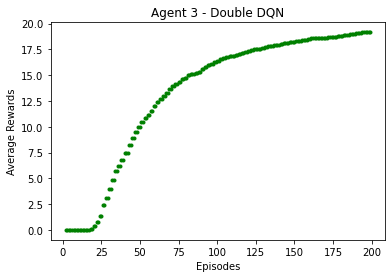

In [4]:
# plot the rewards of agent 3
plt.title("Agent 3 - Double DQN")
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
a3 = plt.plot(avg_rewards_3, 'g.')

#### Evaluate Agent 3

In [5]:
# evaluate agent for 5 episodes
agent_3.evaluate()
# shutdown ray
ray.shutdown()
#show agent_2 evaluation metrics
agent_3.evaluation_metrics

{'evaluation': {'episode_reward_max': 25.0,
  'episode_reward_min': 24.0,
  'episode_reward_mean': 24.2,
  'episode_len_mean': 2048.0,
  'episode_media': {},
  'episodes_this_iter': 5,
  'policy_reward_min': {},
  'policy_reward_max': {},
  'policy_reward_mean': {},
  'custom_metrics': {},
  'hist_stats': {'episode_reward': [24.0, 24.0, 24.0, 25.0, 24.0],
   'episode_lengths': [2048, 2048, 2048, 2048, 2048]},
  'sampler_perf': {'mean_raw_obs_processing_ms': 0.08993371833687287,
   'mean_inference_ms': 0.558637476167622,
   'mean_action_processing_ms': 0.025392661231090963,
   'mean_env_wait_ms': 0.6782928489518927,
   'mean_env_render_ms': 1.1537799075320065},
  'off_policy_estimator': {},
  'timesteps_this_iter': 0}}

Agent 3 with optimal configuration reached an average of 20 rewards after 200 iterations and from that point it started reaching plateau. During evaluation it was able to achieve an average of 24.2 rewards, after playing 5 episodes, which is pretty impresive considering back in the day Activition used to send a cloth "Save The Chicken Foundation" patch to every player that managed to score 20 or more points on either Road 3 or Road 7 and sent in a photograph of thei television screen. [1]

References
- [1] Freeway (video game), Wikipedia https://en.wikipedia.org/wiki/Freeway_(video_game)